# Figure 1
-multipanel biogeochem figure with site map
-make one with regression stats and one with correlation stats

## Setup

In [29]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(ggmap))
suppressWarnings(library(ggsn))
suppressWarnings(library(cowplot))
suppressWarnings(library(car))
`%notin%` <- Negate(`%in%`)

In [44]:
# Colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep = '\t', header = T, row.names = 1) %>%
    set_names(c('color','Location'))

# Metadata
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep = "\t", header = TRUE) %>%
    mutate(Location = factor(Location, levels = rownames(site_colors))) %>%
    mutate(CH4_logn1 = log10(CH4_ug_m2_h - (1.05*min(CH4_ug_m2_h)))) %>%
    mutate(CO2_logn1 = log10(CO2_mg_m2_h - (1.05*min(CO2_mg_m2_h))))

Mayberry = subset(metaDB, Location == "Mayberry")

# Geographic coordinates
coords <- read.csv("../data/meta/Coords.csv") %>%
    left_join(., site_colors, by = "Location")

Warning message in mask$eval_all_mutate(quo):
“NaNs produced”


## Regression Stats

In [35]:
print('Log CH4, Salinity - Linear')
m1 <- lm(CH4_logn1 ~ Salinity.x, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Salinity - Polynomial')
m1 <- lm(CH4_logn1 ~ poly(Salinity.x, 2), data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Log CO2')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Log CH4, Log CO2 - Mayberry Only')
m1 <- lm(CH4_logn1 ~ CO2_logn1, data = subset(metaDB, Location == "Mayberry"))
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('C, Salinity')
m1 <- lm(C ~ Salinity.x, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('N:P, C')
m1 <- lm(NP ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('NH4, C')
m1 <- lm(NH4_N ~ C, data = metaDB)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

[1] "Log CH4, Salinity - Linear"


[1] 0.15

[1] 1.535555e-07

[1] "Log CH4, Salinity - Polynomial"


[1] 0.18

[1] 1.04033e-07

[1] "Log CH4, Log CO2"


[1] 0.25

[1] 1.199232e-11

[1] "Log CH4, Log CO2 - Mayberry Only"


[1] 0.88

[1] 2.583164e-17

[1] "C, Salinity"


[1] 0.27

[1] 3.835379e-13

[1] "N:P, C"


[1] 0.78

[1] 1.300358e-57

[1] "NH4, C"


[1] 0.65

[1] 1.227334e-40

## Figure

In [17]:
a <- ggplot(metaDB, aes(Salinity.x, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(Salinity.x, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 2, label = "R^2 == 0.15"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 5, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)"),
       shape = NULL) +
  scale_colour_manual(values = site_colors$color) +
  scale_shape_manual(values = c(16, 17), labels = c("Reference", "Restored")) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  guides(colour = F,
         shape = guide_legend(override.aes = list(size = 3))) +
  theme_classic() +
  theme(legend.position = c(0.5, 0.9),
        legend.text = element_text(size = 11, color = "black"), 
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


In [18]:
# Map with ggmap
# Colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", 
                          sep = '\t', header = T, row.names = 1) %>%
  set_names(c('color','Location'))

# Metadata
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep = "\t", header = TRUE) %>%
  mutate(Location = factor(Location, levels = rownames(site_colors)))

# Geographic coordinates
coords <- read.csv("../data/meta/Coords.csv") %>%
  left_join(., site_colors, by = "Location")
adjust = c("RushRanch", "Browns")
coords1 <- subset(coords, Location %notin% adjust)
coords2 <- subset(coords, Location == "RushRanch")
coords3 <- subset(coords, Location == "Browns")

# Map
sfbay <- get_stamenmap(bbox = c(left = -122.6, 
                                bottom = 37.730988, 
                                right = -121.5, 
                                top = 38.263536),
                           zoom = 10, 
                           maptype = "terrain-background")
sfbay_attributes <- attributes(sfbay)
sfbay_transparent <- matrix(adjustcolor(sfbay, alpha.f = 0.4), nrow = nrow(sfbay))
attributes(sfbay_transparent) <- sfbay_attributes

path <- data.frame(x = c(-121.93, -121.93, -121.50),
                   y = c(38.263536, 37.95, 37.95))
b <- ggmap(sfbay_transparent) + # the base map
  geom_point(data = coords,
             aes(x = longitude, y = latitude, colour = Location, shape = Status), size =  4) +
  geom_text(data = coords1, aes(x = longitude, y = latitude - 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords2, aes(x = longitude - 0.02, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords3, aes(x = longitude + 0.002, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(aes(x = -121.7, y = 38.2, label = "Delta"), 
            colour = "black", size = 6, fontface = "italic", check_overlap = T) +
  geom_text(aes(x = -122.4, y = 38.05, label = "San Pablo\nBay"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.55, y = 37.79, label = "Pacific\nOcean"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.44, y = 37.75, label = "San Francisco"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.27, y = 37.81, label = "Oakland"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_path(data = path, aes(x = x, y = y), linetype = "dashed", size = 0.25) +
  geom_segment(aes(x = -121.54, xend = -121.54, y = 37.74, yend = 37.77), arrow = arrow(length = unit(0.30, "cm"))) +
  geom_text(aes(x = -121.54, y = 37.79, label = "N"), 
            colour = "black", size = 4, check_overlap = T) +
  scale_colour_manual(values = site_colors$color) +
  xlab(NULL) + 
  ylab(NULL) +
  scalebar(x.min = -122.6, 
           y.min = 37.76, 
           x.max = -121.6, 
           y.max = 38.26, 
           dist = 10, dist_unit = "km", height = 0.02, st.dist = 0.03, st.size = 4,
           transform = TRUE, model = "WGS84", location = "bottomright") +
  theme(legend.position = "none",
        plot.margin = unit(c(-0.6,0.6,-0.6,0), "cm"),
        axis.text = element_text(size = 8, color = "black"))

In [19]:
c <- ggplot(metaDB, aes(CO2_mg_m2_h, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(data = subset(metaDB, Location == "Mayberry"),
              aes(CO2_mg_m2_h, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "#2c9553") +
  geom_smooth(aes(CO2_mg_m2_h, CH4_ug_m2_h), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.88"), parse = TRUE, size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -3, label = "R^2 == 0.25"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -2, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = expression(""*CO[2]*" flux (mg/"*m^2*"/h)"), 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)")) +
  scale_colour_manual(values = site_colors$color) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

In [20]:
d <- ggplot(metaDB, aes(Salinity.x, C, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(Salinity.x, C), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 1, label = "R^2 == 0.27"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = "Soil % C") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [21]:
e <- ggplot(metaDB, aes(C, NP, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NP), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.78"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = "Soil N:P") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [22]:
f <- ggplot(metaDB, aes(C, NH4_N, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_smooth(aes(C, NH4_N), method = "lm", 
              inherit.aes = F, se = F, size = 0.5, color = "black") +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "R^2 == 0.65"), parse = TRUE, size = 2, color = "black",
                                                                                            check_overlap = T) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 4, label = "p < 0.001"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = expression(""*NH[4]^{"+"}*" (mg/g)")) +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


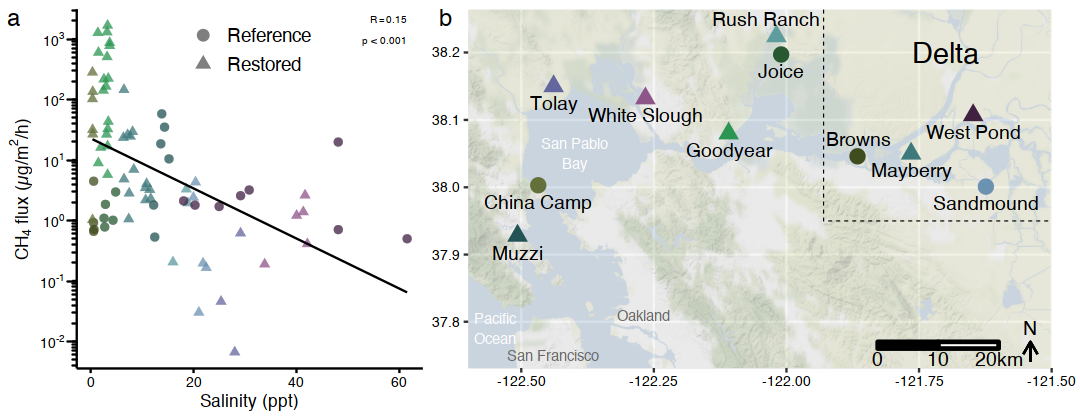

In [23]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
top <- plot_grid(a, b, ncol = 2, align = "h", rel_widths = c(1, 1.5), labels = c("a", "b"), axis = c("tblr"))
top

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



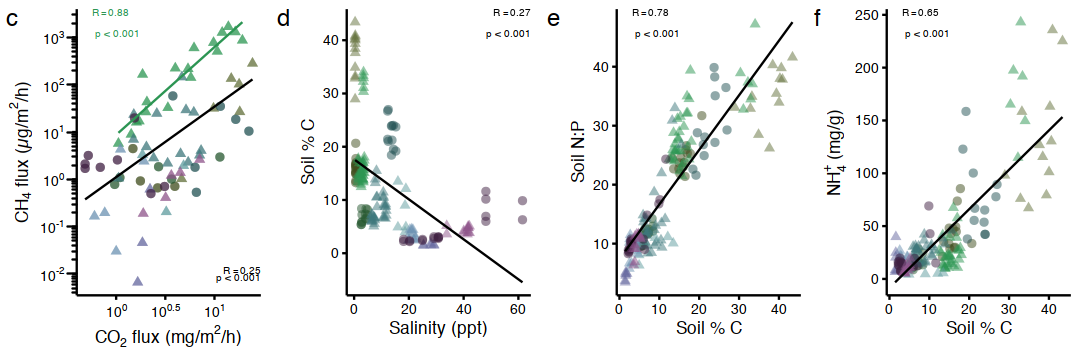

In [24]:
options(repr.plot.width = 9, repr.plot.height = 3)
bottom <- plot_grid(c, d, e, f, ncol = 4, align = "hv", axis = "trbl", labels = c("c", "d", "e", "f"))
bottom

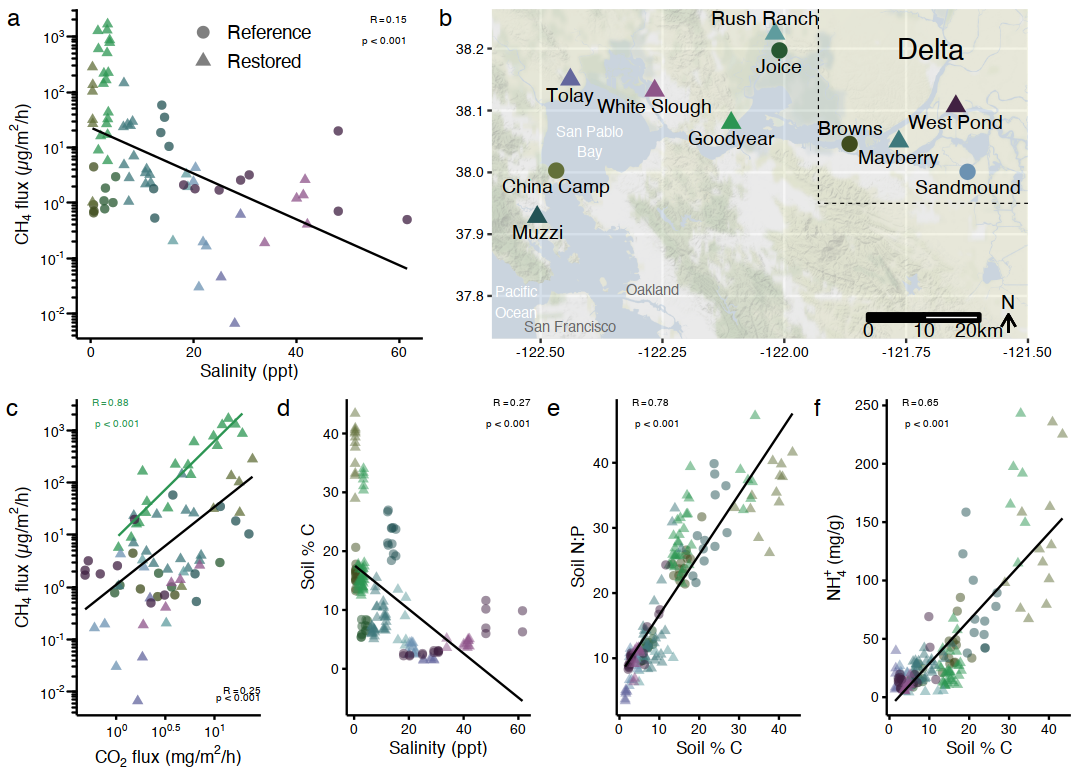

In [25]:
options(repr.plot.width = 9, repr.plot.height = 6.5)
figure1 <- plot_grid(top, bottom, ncol = 1)
figure1
# Difficult to make top row bigger without changing map - combine top and bottom manually

In [26]:
pdf("../figs/Figure1ab_reg.pdf", width = 9, height = 3.5)
top
dev.off()

pdf("../figs/Figure1cdef_reg.pdf", width = 9, height = 2)
bottom
dev.off()

pdf 
  2

pdf 
  2

## Correlation Stats

In [45]:
print('Log CH4, Salinity')
m1 <- cor.test(metaDB$Salinity.x, metaDB$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('Log CH4, Log CO2')
m1 <- cor.test(metaDB$CO2_logn1, metaDB$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('Log CH4, Log CO2 - Mayberry Only')
m1 <- cor.test(Mayberry$CO2_logn1, Mayberry$CH4_logn1)
round(m1$estimate, digits = 2)
m1$p.value

print('C, Salinity')
m1 <- cor.test(metaDB$Salinity.x, metaDB$C)
round(m1$estimate, digits = 2)
m1$p.value

print('N:P, C')
m1 <- cor.test(metaDB$C, metaDB$NP)
round(m1$estimate, digits = 2)
m1$p.value

print('NH4, C')
m1 <- cor.test(metaDB$C, metaDB$NH4_N)
round(m1$estimate, digits = 2)
m1$p.value

[1] "Log CH4, Salinity"


cor 
-0.39

[1] 1.535555e-07

[1] "Log CH4, Log CO2"


cor 
0.5

[1] 1.199232e-11

[1] "Log CH4, Log CO2 - Mayberry Only"


cor 
0.94

[1] 2.583164e-17

[1] "C, Salinity"


cor 
-0.52

[1] 3.835379e-13

[1] "N:P, C"


cor 
0.88

[1] 1.300358e-57

[1] "NH4, C"


cor 
0.81

[1] 1.227334e-40

## Figure

In [59]:
a <- ggplot(metaDB, aes(Salinity.x, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = max(Salinity.x), y = Inf, hjust = 1, vjust = 2, label = "r = -0.39"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)"),
       shape = NULL) +
  scale_colour_manual(values = site_colors$color) +
  scale_shape_manual(values = c(16, 17), labels = c("Reference", "Restored")) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  guides(colour = "none",
         shape = guide_legend(override.aes = list(size = 3))) +
  theme_classic() +
  theme(legend.position = c(0.5, 0.9),
        legend.text = element_text(size = 11, color = "black"), 
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

In [60]:
# Map with ggmap
# Colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", 
                          sep = '\t', header = T, row.names = 1) %>%
  set_names(c('color','Location'))

# Metadata
metaDB <- read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep = "\t", header = TRUE) %>%
  mutate(Location = factor(Location, levels = rownames(site_colors)))

# Geographic coordinates
coords <- read.csv("../data/meta/Coords.csv") %>%
  left_join(., site_colors, by = "Location")
adjust = c("RushRanch", "Browns")
coords1 <- subset(coords, Location %notin% adjust)
coords2 <- subset(coords, Location == "RushRanch")
coords3 <- subset(coords, Location == "Browns")

# Map
sfbay <- get_stamenmap(bbox = c(left = -122.6, 
                                bottom = 37.730988, 
                                right = -121.5, 
                                top = 38.263536),
                           zoom = 10, 
                           maptype = "terrain-background")
sfbay_attributes <- attributes(sfbay)
sfbay_transparent <- matrix(adjustcolor(sfbay, alpha.f = 0.4), nrow = nrow(sfbay))
attributes(sfbay_transparent) <- sfbay_attributes

path <- data.frame(x = c(-121.93, -121.93, -121.50),
                   y = c(38.263536, 37.95, 37.95))
b <- ggmap(sfbay_transparent) + # the base map
  geom_point(data = coords,
             aes(x = longitude, y = latitude, colour = Location, shape = Status), size =  4) +
  geom_text(data = coords1, aes(x = longitude, y = latitude - 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords2, aes(x = longitude - 0.02, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(data = coords3, aes(x = longitude + 0.002, y = latitude + 0.025, label = Site), 
            colour = "black", size = 4, fontface = "bold", check_overlap = T) +
  geom_text(aes(x = -121.7, y = 38.2, label = "Delta"), 
            colour = "black", size = 6, fontface = "italic", check_overlap = T) +
  geom_text(aes(x = -122.4, y = 38.05, label = "San Pablo\nBay"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.55, y = 37.79, label = "Pacific\nOcean"), 
            colour = "white", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.44, y = 37.75, label = "San Francisco"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_text(aes(x = -122.27, y = 37.81, label = "Oakland"), 
            colour = "grey40", size = 3, check_overlap = T) +
  geom_path(data = path, aes(x = x, y = y), linetype = "dashed", size = 0.25) +
  geom_segment(aes(x = -121.54, xend = -121.54, y = 37.74, yend = 37.77), arrow = arrow(length = unit(0.30, "cm"))) +
  geom_text(aes(x = -121.54, y = 37.79, label = "N"), 
            colour = "black", size = 4, check_overlap = T) +
  scale_colour_manual(values = site_colors$color) +
  xlab(NULL) + 
  ylab(NULL) +
  scalebar(x.min = -122.6, 
           y.min = 37.76, 
           x.max = -121.6, 
           y.max = 38.26, 
           dist = 10, dist_unit = "km", height = 0.02, st.dist = 0.03, st.size = 4,
           transform = TRUE, model = "WGS84", location = "bottomright") +
  theme(legend.position = "none",
        plot.margin = unit(c(-0.6,0.6,-0.6,0), "cm"),
        axis.text = element_text(size = 8, color = "black"))

In [61]:
c <- ggplot(metaDB, aes(CO2_mg_m2_h, CH4_ug_m2_h, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = 0, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.94"), size = 2, color = "#2c9553",
                                                                                            check_overlap = T) +
  geom_text(aes(x = Inf, y = 0, hjust = 1, vjust = -2, label = "r = 0.5"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = expression(""*CO[2]*" flux (mg/"*m^2*"/h)"), 
       y = expression(""*CH[4]*" flux (µg/"*m^2*"/h)")) +
  scale_colour_manual(values = site_colors$color) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  annotation_logticks(sides = "l", outside = T, short = unit(1,"mm"), mid = unit(1,"mm"), long = unit(2,"mm")) +
  coord_cartesian(clip = "off") +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text.x = element_text(size = 8, color = "black"),
        axis.text.y = element_text(size = 8, color = "black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.ticks = element_line(color = "black"))

In [62]:
d <- ggplot(metaDB, aes(Salinity.x, C, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = Inf, y = Inf, hjust = 1, vjust = 1, label = "r = -0.52"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Salinity (ppt)", 
       y = "Soil % C") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [63]:
e <- ggplot(metaDB, aes(C, NP, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.88"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = "Soil N:P") +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

In [69]:
f <- ggplot(metaDB, aes(C, NH4_N, colour = Location)) +
  geom_point(size = 2, alpha = 0.5, aes(shape = EWcoastGroup)) +
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.4, vjust = 1, label = "r = 0.81"), size = 2, color = "black",
                                                                                            check_overlap = T) +
  labs(x = "Soil % C", 
       y = expression(""*NH[4]^{"+"}*" (mg/g)")) +
  scale_colour_manual(values = site_colors$color) +
  theme_classic() +
  theme(legend.position = "none",
        axis.title = element_text(size = 10, color = "black"), 
        axis.text = element_text(size = 8, color = "black"),
        axis.ticks = element_line(color = "black"))

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


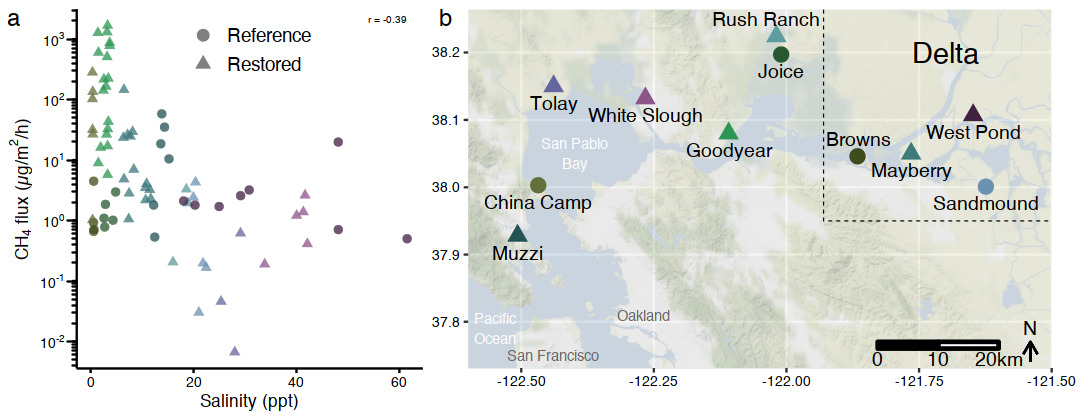

In [70]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
top <- plot_grid(a, b, ncol = 2, align = "h", rel_widths = c(1, 1.5), labels = c("a", "b"), axis = c("tblr"))
top

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


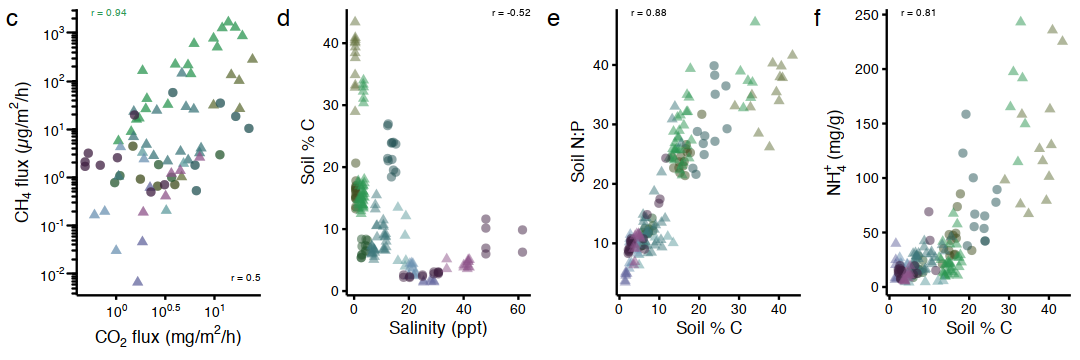

In [71]:
options(repr.plot.width = 9, repr.plot.height = 3)
bottom <- plot_grid(c, d, e, f, ncol = 4, align = "hv", axis = "trbl", labels = c("c", "d", "e", "f"))
bottom

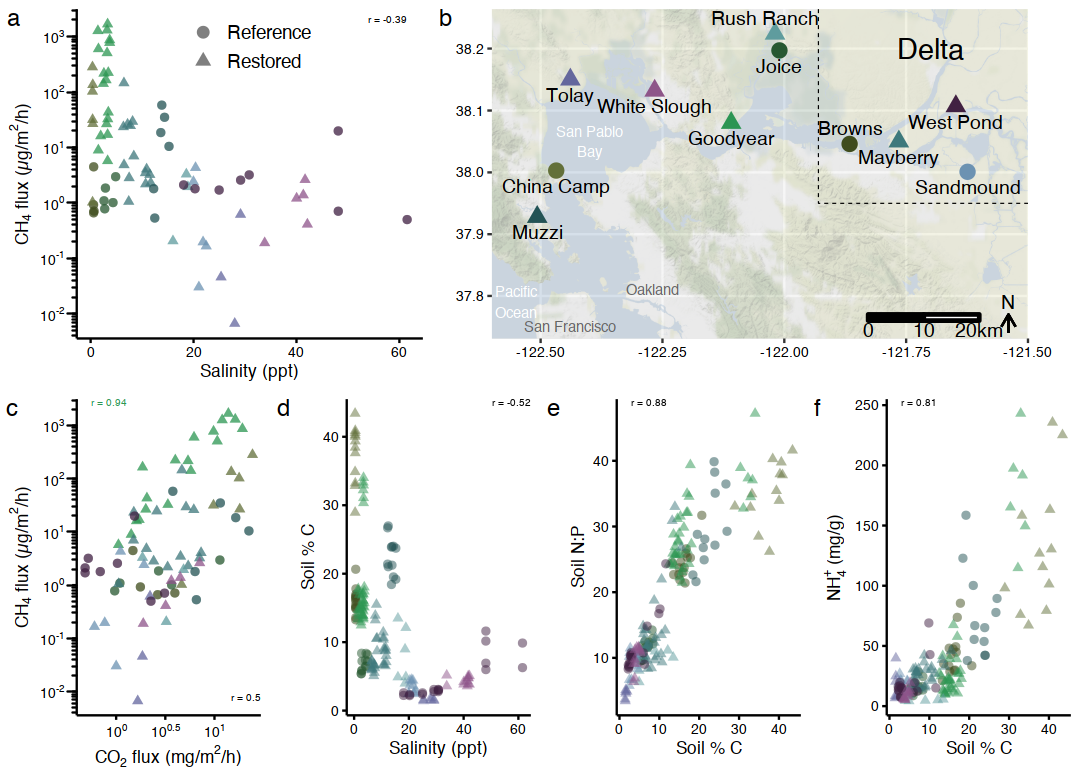

In [72]:
options(repr.plot.width = 9, repr.plot.height = 6.5)
figure1 <- plot_grid(top, bottom, ncol = 1)
figure1
# Difficult to make top row bigger without changing map - combine top and bottom manually

In [73]:
pdf("../figs/Figure1ab_cor.pdf", width = 9, height = 3.5)
top
dev.off()

pdf("../figs/Figure1cdef_cor.pdf", width = 9, height = 2)
bottom
dev.off()

pdf 
  2

pdf 
  2